In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import obspy
from obspy.core import read, UTCDateTime, Stream
from obspy.clients.fdsn.client import Client
from obspy.geodetics import gps2dist_azimuth
from matplotlib.transforms import blended_transform_factory


In [6]:
# set client
client = Client('IRIS')
t1 = UTCDateTime("2013-09-03T20:19:08.880")
t2 = UTCDateTime("2013-09-03T21:25:18.380")
t3 = UTCDateTime("2013-09-03T22:29:33.000")
t4 = UTCDateTime("2013-09-04T00:23:12.230")

tstart = UTCDateTime("2013-09-03T20:18:40.000")
tend = t1 + 4.6*60*60

t1_diff = np.abs(t1 - tstart)
t2_diff = np.abs(t2 - tstart)
t3_diff = np.abs(t3 - tstart)
t4_diff = np.abs(t4 - tstart)

eq_lat = 51.0078
eq_lon = -130.6787

In [5]:
network = '7D'
stations = ['J63C',
            'J69C',
            'J68C',
            'J55C',
            'J73C',
            'J61C',
            'J46C',
            'J44C',
            'M08C',
            'J30C',
            'M04C',
            'J36C',
            'J23C',
            'J25C']
channel = 'BHZ'

st = Stream()location, channel 
for station in stations:
    st += client.get_waveforms(network, station, '*', channel, tstart, tend)

NameError: name 'tstart' is not defined

In [13]:
metadata = client.get_stations(network=network, station=stations[0], channel=channel, level='response')
for station in stations[1:]:
    metadata += client.get_stations(network=network, station=station, channel=channel, level='response')


Inventory created at 2024-10-26T01:06:34.280154Z
	Created by: ObsPy 1.4.1
		    https://www.obspy.org
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (14):
			7D (14x)
		Stations (14):
			7D.J23C (WHOI OBS ID S82)
			7D.J25C (SIO OBS ID J25C)
			7D.J30C (WHOI OBS ID T103)
			7D.J36C (WHOI OBS ID T108)
			7D.J44C (WHOI OBS ID T101)
			7D.J46C (WHOI OBS ID T107)
			7D.J55C (WHOI OBS ID S89)
			7D.J61C (SIO OBS ID J61C)
			7D.J63C (WHOI OBS ID S84)
			7D.J68C (SIO OBS ID J68C)
			7D.J69C (WHOI OBS ID S85)
			7D.J73C (SIO OBS ID J73C)
			7D.M04C (SIO OBS ID M04C)
			7D.M08C (SIO OBS ID M08C)
		Channels (14):
			7D.J23C..BHZ, 7D.J25C..BHZ, 7D.J30C..BHZ, 7D.J36C..BHZ, 
			7D.J44C..BHZ, 7D.J46C..BHZ, 7D.J55C..BHZ, 7D.J61C..BHZ, 
			7D.J63C..BHZ, 7D.J68C..BHZ, 7D.J69C..BHZ, 7D.J73C..BHZ, 
			7D.M04C..BHZ, 7D.M08C..BHZ


In [1]:
from io_scripts import gmap2inv

inv = gmap2inv('../data/gmap-stations.txt', '*', 'BHZ')
print(inv)

Failed to download station: 1H.MG011
Failed to download station: 1H.MH013
Failed to download station: 1H.MJ010
Failed to download station: 1H.MJ013
Failed to download station: 1H.MK010
Failed to download station: 1H.MN011
Failed to download station: 1H.MO010
Failed to download station: 1H.MO012
Failed to download station: 1H.MP010
Failed to download station: 1H.MQ011
Failed to download station: 7D.FN01C
Failed to download station: 7D.FN02C
Failed to download station: 7D.FN03C
Failed to download station: 7D.FN04C
Failed to download station: 7D.FN05C
Failed to download station: 7D.FN06C
Failed to download station: 7D.FN07C
Failed to download station: 7D.FN08C
Failed to download station: 7D.FN09C
Failed to download station: 7D.FN10C
Failed to download station: 7D.FN11C
Failed to download station: 7D.FN12C
Failed to download station: 7D.FN13C
Failed to download station: 7D.FN14C
Failed to download station: 7D.FN16C
Failed to download station: 7D.FN17C
Failed to download station: 7D.FN18C
F

In [6]:
latlon = []

for i in range(len(st)):
    latlon.append((metadata[i][0][0].latitude, metadata[i][0][0].longitude))

for tr, latlon in zip(st, latlon):
    tr.stats.distance = gps2dist_azimuth(eq_lat, eq_lon, latlon[0], latlon[1])[0]

Text(0.5, 1.05, '2013-09-03 20:19:08 7D (Cascadia Initiative) BHZ')

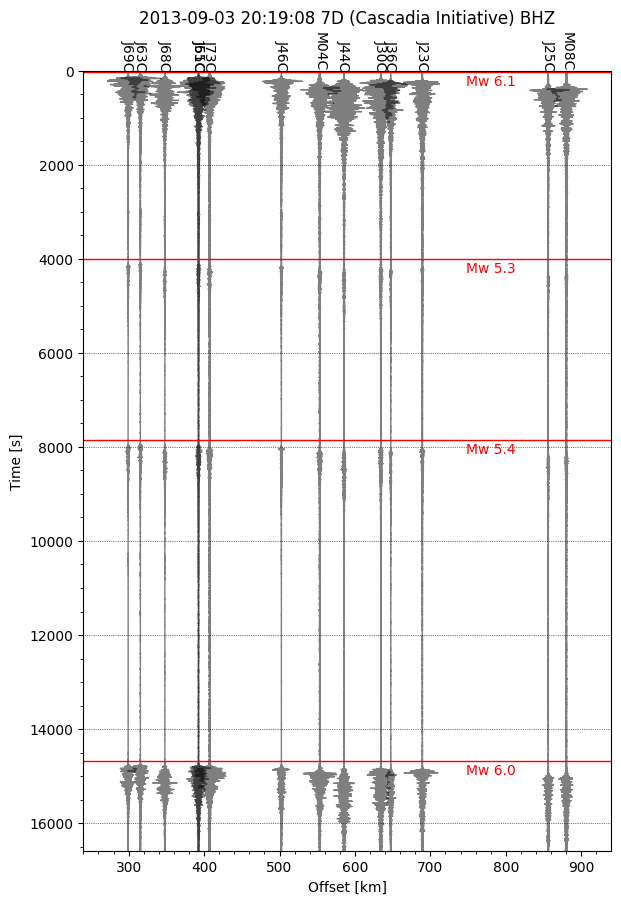

In [7]:
st.filter('bandpass', freqmin=0.1, freqmax=10)

fig = plt.figure(figsize=(6, 10))
st.plot(type='section', time_down=True, fig=fig, )

# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in st:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=270,
            va="bottom", ha="center", transform=transform, zorder=10)
    
ax.axhline(t1_diff, color='red', lw=1)
ax.axhline(t2_diff, color='red', lw=1)
ax.axhline(t3_diff, color='red', lw=1)
ax.axhline(t4_diff, color='red', lw=1)

ax.text(780, t1_diff+200, 'Mw 6.1', color='red', va='center', ha='center')
ax.text(780, t2_diff+200, 'Mw 5.3', color='red', va='center', ha='center')
ax.text(780, t3_diff+200, 'Mw 5.4', color='red', va='center', ha='center')
ax.text(780, t4_diff+200, 'Mw 6.0', color='red', va='center', ha='center')

ax.set_title(f'{t1.strftime("%Y-%m-%d %H:%M:%S")} 7D (Cascadia Initiative) BHZ', y=1.05)